In [298]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')
# !pip install catboost


## DATA COLLECTION


In [299]:
data = pd.read_csv('train_data.csv')
data.head()
print(data['Date_of_Occupancy'].skew())

-3.163613535958445


In [300]:
pd.options.display.max_rows = 15
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [301]:
data.Garden.value_counts()

O    3602
V    3551
Name: Garden, dtype: int64

In [302]:
data.describe(include = 'all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
count,7160,7160.000000,7160.000000,7160.000000,7160,7160,7153,7160,7054.000000,7160.000000,6652.000000,7160,7058,7160.000000
unique,7160,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,11,1307,NaN
top,H16645,NaN,NaN,NaN,V,N,O,R,NaN,NaN,NaN,.,6088,NaN
freq,1,NaN,NaN,NaN,5382,3608,3602,3610,NaN,NaN,NaN,3551,143,NaN
mean,NaN,2013.669553,0.909758,0.305447,NaN,NaN,NaN,NaN,1883.727530,2.186034,1964.456404,NaN,NaN,0.228212
std,NaN,1.383769,0.239756,0.460629,NaN,NaN,NaN,NaN,2278.157745,0.940632,36.002014,NaN,NaN,0.419709
min,NaN,2012.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1545.000000,NaN,NaN,0.000000
25%,NaN,2012.000000,0.997268,0.000000,NaN,NaN,NaN,NaN,528.000000,2.000000,1960.000000,NaN,NaN,0.000000
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1083.000000,2.000000,1970.000000,NaN,NaN,0.000000
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2289.750000,3.000000,1980.000000,NaN,NaN,0.000000


In [303]:

pd.crosstab(data.Settlement, data.Building_Fenced)

Building_Fenced,N,V
Settlement,,
R,3608,2
U,0,3550


In [304]:
data['Garden'] = data['Garden'].fillna('O')
data['Fine_House'] = np.where((data['Garden'] == 'V') & (data['Settlement'] == 'U'), 1,0)
# data['Fine_House'] = np.where((data['Fine_House'] == 1) & (data['Building_Fenced'] == 'V'), 1,0)


In [305]:
pd.crosstab(data.Building_Fenced,data.Fine_House)

Fine_House,0,1
Building_Fenced,,
N,3608,0
V,2,3550


In [306]:
data.Fine_House.value_counts()

0    3610
1    3550
Name: Fine_House, dtype: int64

In [307]:
# data['Building Dimension'].value_counts()
pd.crosstab(data.Claim,data['Building Dimension'])

Building Dimension,1.0,10.0,12.0,14.0,15.0,17.0,20.0,22.0,30.0,35.0,...,17800.0,17860.0,18000.0,18950.0,19195.0,19495.0,20000.0,20818.0,20840.0,20940.0
Claim,,,,,,,,,,,,,,,,,,,,,
0,7,7,1,1,2,2,2,1,2,1,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,1


In [308]:
data['Building Dimension'] = data['Building Dimension'].fillna(data['Building Dimension'].mean())
# b = data['Building Dimension'].quantile(0.30)
# c = data['Building Dimension'].quantile(0.70)
# data["Building Dimension"] = np.where(data["Building Dimension"] <b, b,data['Building Dimension'])
# data["Building Dimension"] = np.where(data["Building Dimension"] >c, c,data['Building Dimension'])
# print(data['Building Dimension'].skew())

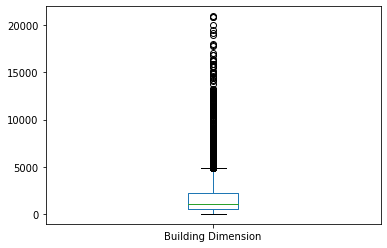

In [309]:
data['Building Dimension'].plot(kind='box')

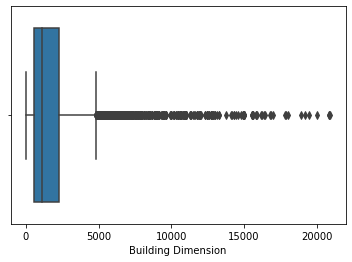

In [310]:
sns.boxplot(x = 'Building Dimension', data=data)

In [311]:
data.Building_Type.value_counts()

2    3305
1    1716
3    1230
4     909
Name: Building_Type, dtype: int64

In [312]:
# mg = pd.crosstab(data.Building_Type, data.Claim)

In [313]:
# mg = mg.to_numpy()
# print(mg)

In [314]:
# for row in range(4):
    # dt = mg[row,0]/mg[row,1]
    # print('Row' + str(row) + '=' + str(dt))

In [315]:
pd.crosstab(data.Fine_House, data.Claim)

Claim,0,1
Fine_House,,
0,2708,902
1,2818,732


In [316]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)  #####detecting the presence of outliers

YearOfObservation        3.000000
Insured_Period           0.002732
Residential              1.000000
Building Dimension    1718.500000
Building_Type            1.000000
Date_of_Occupancy       20.000000
Claim                    0.000000
Fine_House               1.000000
dtype: float64


In [317]:
# print(data['Building Dimension'].skew())
# data['Building Dimension'].describe()
##### detecting outliers through skewness

## DATA ANALYSIS

In [318]:
# data['New_Date_of_Occupancy'] = (data['Date_of_Occupancy'] - data['Date_of_Occupancy'].mean())/data['Date_of_Occupancy'].std()
# print(data['New_Date_of_Occupancy'])   # for standard deviation of Date of occupancy

In [319]:
# data['New_Date_of_Occupancy'].plot.kde() ### for detectng outliers

In [320]:
# data.boxplot(column='Date_of_Occupancy', by='Building Dimension')

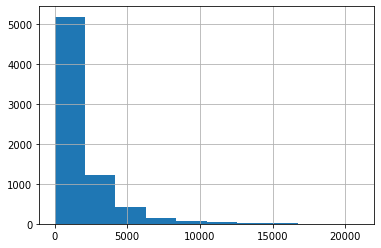

In [321]:
data['Building Dimension'].hist()

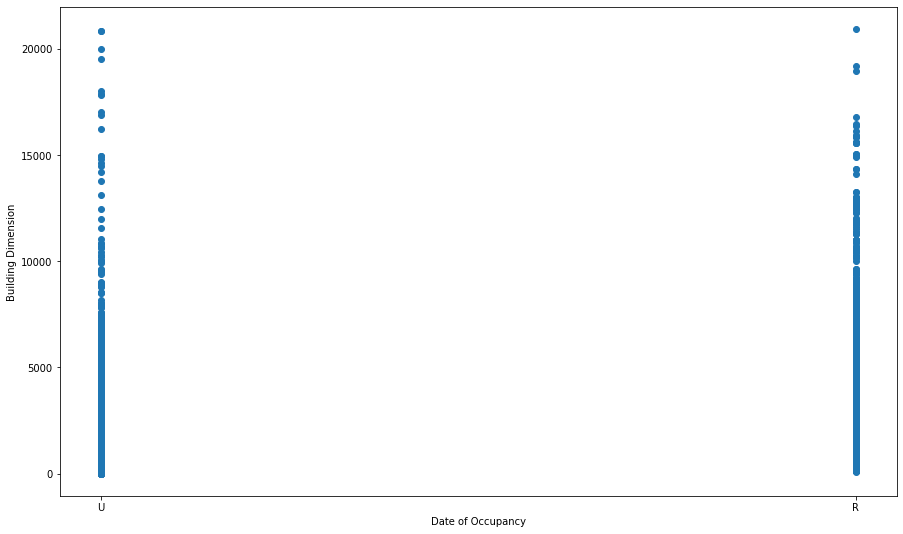

In [322]:
fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(data['Settlement'], data['Building Dimension'])
ax.set_xlabel('Date of Occupancy')
ax.set_ylabel('Building Dimension')
plt.show()    

### scatter plots for detecting outliers

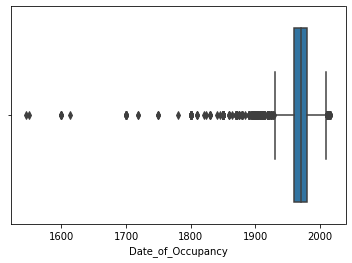

In [323]:
sns.boxplot(data["Date_of_Occupancy"])

## TREATING OUTLIERS

In [324]:
data['Date_of_Occupancy'] = data['Date_of_Occupancy'].fillna(data['Date_of_Occupancy'].mean())
# b = data['Date_of_Occupancy'].quantile(0.30)
# c = data['Date_of_Occupancy'].quantile(0.70)
# data["Date_of_Occupancy"] = np.where(data["Date_of_Occupancy"] <b, b,data['Date_of_Occupancy'])
#data["Date_of_Occupancy"] = np.where(data["Date_of_Occupancy"] >c, c,data['Date_of_Occupancy'])
#print(data['Date_of_Occupancy'].skew())

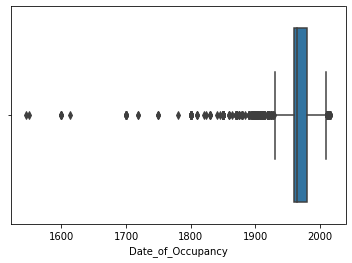

In [325]:
sns.boxplot(data["Date_of_Occupancy"])

In [326]:
# data["Log_DateOccup"] = data["Date_of_Occupancy"].map(lambda i: np.log(i) if i > 0 else 0) 
# print(data['Date_of_Occupancy'].skew())
# print(data['Log_DateOccup'].skew())

## USING LOG TRANSFORMATION TO DEAL WITH DATE OF OCCUPANCY.

In [327]:
# print(data['Date_of_Occupancy'].quantile(0.50)) 
# print(data['Date_of_Occupancy'].quantile(0.95)) 
# data['Date_of_Occupancy'] = np.where(data['Date_of_Occupancy'] > 2009, 1970, data['Date_of_Occupancy'])
# print(data['Date_of_Occupancy'].skew())


### REplacing Outliers with Median Values

In [328]:

data.drop(['Garden','Settlement'],axis = 1, inplace = True)

In [329]:
pd.options.display.max_rows = 5



In [330]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Fine_House
0,H14663,2013,1.0,0,N,V,290.0,1,1960.0,.,1053,0,1
1,H2037,2015,1.0,0,V,N,490.0,1,1850.0,4,1053,0,0
2,H3802,2014,1.0,0,N,V,595.0,1,1960.0,.,1053,0,1
3,H3834,2013,1.0,0,V,V,2840.0,1,1960.0,.,1053,0,1
4,H5053,2014,1.0,0,V,N,680.0,1,1800.0,3,1053,0,0


In [331]:

pd.options.display.max_rows = 15

In [332]:
data.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
Fine_House              0
dtype: int64

In [333]:
#data.Date_of_Occupancy[data.Date_of_Occupancy < 1800] = np.mean(data.Date_of_Occupancy)

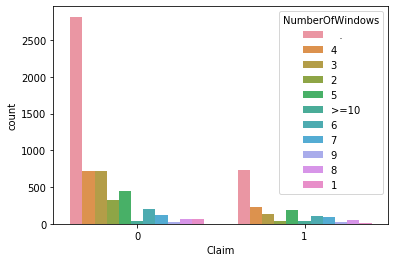

In [334]:
sns.countplot(x='Claim', hue = 'NumberOfWindows', data=data)

In [335]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# data['YearOfObservation'] = le.fit_transform(data['YearOfObservation'])

In [336]:
data.NumberOfWindows.value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [337]:
# data['NumberOfWindows'] = data['NumberOfWindows'].replace('>=10',0)
# data['NumberOfWindows'] = data['NumberOfWindows'].replace('   .',0)
cc = data.drop(["Customer Id"], axis=1, inplace=True)

In [338]:
data.NumberOfWindows.value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [339]:
data.NumberOfWindows[data.NumberOfWindows== '>=10']=4
data.NumberOfWindows[data.NumberOfWindows== '4']=2
data.NumberOfWindows[data.NumberOfWindows== '3']=2
data.NumberOfWindows[data.NumberOfWindows== '2']=3
data.NumberOfWindows[data.NumberOfWindows== '6']=3
data.NumberOfWindows[data.NumberOfWindows== '7']=3
data.NumberOfWindows[data.NumberOfWindows== '1']=4
data.NumberOfWindows[data.NumberOfWindows== '9']=4
data.NumberOfWindows[data.NumberOfWindows== '   .']=1
data.NumberOfWindows[data.NumberOfWindows== '5']=2
data.NumberOfWindows[data.NumberOfWindows== '8']=4

In [340]:
data.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
Fine_House              0
dtype: int64

In [341]:
# data["Building_Painted"] = data["Building_Painted"].astype('category')
# data["Building_Painted_loc_cat"] = data["Building_Painted"].cat.codes
# data["Building_Painted"] =  data["Building_Painted_loc_cat"]


In [342]:
data[data.Geo_Code.isnull()]

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Fine_House
7058,2013,1.000000,0,V,V,1883.72753,4,1990.0,1,NaN,0,1
7059,2013,0.893151,1,V,V,1883.72753,2,2002.0,1,NaN,0,1
7060,2015,0.947945,0,V,V,1883.72753,2,1870.0,1,NaN,1,1
7061,2014,1.000000,0,V,V,1883.72753,2,1870.0,1,NaN,0,1
7062,2012,1.000000,1,V,V,1883.72753,3,1950.0,1,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7155,2012,1.000000,1,V,V,1883.72753,1,2001.0,1,NaN,0,1
7156,2013,1.000000,0,V,V,1883.72753,2,1980.0,1,NaN,1,1
7157,2016,0.038251,0,V,V,1883.72753,1,1992.0,1,NaN,0,1
7158,2013,1.000000,0,V,V,1883.72753,1,1972.0,1,NaN,0,1


In [343]:
data['Geo_Code'] = data.Geo_Code.fillna('2B353')

In [344]:
# data["Garden"] = data["Garden"].astype('category')
# data["Garden_loc_cat"] = data["Garden"].cat.codes
# data["Garden"] =  data["Garden_loc_cat"]
data.Geo_Code.isnull().sum()

0

In [345]:
for m in data.Geo_Code:
    if isinstance(m,str) == True:
        data['Geo_Code'] = data.Geo_Code.replace(m,2)
    else:
        data['Geo_Code'] = data.Geo_Code.replace(m,1)
        #m = 3
    
    

In [346]:
# data['NumberOfWindows']= le.fit_transform(data['NumberOfWindows'])
data.Geo_Code.value_counts()

1    7056
2     104
Name: Geo_Code, dtype: int64

In [347]:
# for m in data.Geo_Code:
  #  if int(m) > 1 and int(m) <=20000:
   #     data['Geo_Code'] = data.Geo_Code.replace(m,1)

data['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [348]:
data = pd.get_dummies(data, columns = ['Building_Painted','Building_Fenced'])
data['YearOfObservation'] = data['YearOfObservation'].replace(2012,1)
data['YearOfObservation'] = data['YearOfObservation'].replace(2013,1)
data['YearOfObservation'] = data['YearOfObservation'].replace(2014,2)
data['YearOfObservation'] = data['YearOfObservation'].replace(2015,3)
data['YearOfObservation'] = data['YearOfObservation'].replace(2016,3)

## Training and Testing

In [349]:
# data.drop(["Geo_Code"], axis=1, inplace=True)

# data.Geo_Code= pd.get_dummies(data.Geo_Code)

In [350]:
X= data.drop('Claim', axis=1)
y=data.Claim

In [351]:
X= data.drop('Claim', axis=1)
y=data.Claim

In [352]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler= StandardScaler()
# X = scaler.fit_transform(X)

In [353]:
from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X = scaler.fit_transform(X)
# preprocessing.scale(X).astype(float)

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier, Pool

In [465]:
# lr = GradientBoostingClassifier(random_state = 10)
Lr = LogisticRegression(random_state =0, solver = 'lbfgs')
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
gauss = GaussianNB()
## sag,saga,newton-cg are other types of solvers


cat = CatBoostClassifier(iterations = 2, depth = 2, learning_rate = 1, loss_function = 'Logloss', verbose = True)
train_pool = Pool(X_train,y_train)
test_pool = Pool(X_test)
cat.fit(train_pool)
cat_pred = cat.predict(test_pool)



Lr.fit(X_train, y_train)
l_pred = Lr.predict(X_test)



gauss.fit(X_train,y_train)
g_pred = gauss.predict(X_test)
# CV(n_jobs = -1, random_state = 10, Cs=3, cv=3, refit = True, class_weight = "balanced")
from sklearn.model_selection import GridSearchCV

0:	learn: 0.5392719	total: 1.54ms	remaining: 1.54ms
1:	learn: 0.4974459	total: 3.31ms	remaining: 0us


In [452]:
# parameters={'C':[0.01,0.1,0.15,0.2,0.4,0.5], 'penalty':['l1', 'l2']}
# clf = GridSearchCV(lr, param_grid = parameters)

# parameter = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators': [100,250,500,750,1000,1250,1500,1750,2000]}
# tuning = GridSearchCV(estimator = GradientBoostingClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, subsample = 1, max_features = 'sqrt', random_state = 10), param_grid = parameter, scoring = 'accuracy', n_jobs = 4, iid=False, cv=3)

In [453]:
# tuning.fit(X_train,y_train)
# print(tuning.best_params_)
# print(tuning.grid_scores_)
# print(tuning.best_score_)

In [454]:
# model = GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 1000, max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', random_state = 10)

In [455]:
# model.fit(X_train,y_train)


In [456]:
# pred = model.predict(X_test)

In [457]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report

In [373]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train,y_train)
d_pred = dtc.predict(X_test)
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1660
           1       0.36      0.35      0.35       488

    accuracy                           0.71      2148
   macro avg       0.58      0.58      0.58      2148
weighted avg       0.71      0.71      0.71      2148



In [374]:
from sklearn.ensemble import RandomForestClassifier
r_class = RandomForestClassifier(n_estimators = 20, criterion = 'entropy')
r_class.fit(X_train, y_train)
r_pred = r_class.predict(X_test)
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1660
           1       0.44      0.28      0.34       488

    accuracy                           0.75      2148
   macro avg       0.62      0.59      0.59      2148
weighted avg       0.72      0.75      0.73      2148



In [375]:
data2 = pd.read_csv('test_data.csv') 
data2.NumberOfWindows.value_counts()

   .    2240
3        227
4        194
5        151
6         70
2         70
7         54
8         26
1         16
>=10      11
9         10
Name: NumberOfWindows, dtype: int64

In [376]:
data2['Garden'] = data2['Garden'].fillna('O')
data2['Fine_House'] = np.where((data2['Garden'] == 'V') & (data2['Settlement'] == 'U'), 1,0)
# data2['Fine_House'] = np.where((data2['Fine_House'] == 1) & (data2['Building_Fenced'] == 'V'), 1,0)


In [377]:
data2['Building Dimension'] = data2['Building Dimension'].fillna(data2['Building Dimension'].mean())
# b = data2['Building Dimension'].quantile(0.30)
# c = data2['Building Dimension'].quantile(0.70)
# data2["Building Dimension"] = np.where(data2["Building Dimension"] <b, b,data2['Building Dimension'])
# data2["Building Dimension"] = np.where(data2["Building Dimension"] >c, c,data2['Building Dimension'])
# print(data2['Building Dimension'].skew())

In [378]:
data2['Date_of_Occupancy'] = data2['Date_of_Occupancy'].fillna(data2['Date_of_Occupancy'].mean())
# data.Date_of_Occupancy[data.Date_of_Occupancy < 1800] = 1800
# print(data2['Date_of_Occupancy'].skew())

In [379]:
data2.drop(['Garden','Settlement'],axis = 1, inplace = True)

In [380]:
data2['Geo_Code'] = data2.Geo_Code.fillna('2B353')


In [381]:
for m in data2.Geo_Code:
    if isinstance(m,str) == True:
        data2['Geo_Code'] = data2.Geo_Code.replace(m,2)
    else:
        data2['Geo_Code'] = data2.Geo_Code.replace(m,1)

In [382]:
# data2['NumberOfWindows'] = data2['NumberOfWindows'].replace('>=10',0)
# data2['NumberOfWindows'] = data2['NumberOfWindows'].replace('   .',0)
data2 = pd.get_dummies(data2, columns = ['Building_Painted','Building_Fenced'])

In [383]:
# cc = data2.drop(["Customer Id"], axis=1, inplace=True)

In [384]:
data2['YearOfObservation'] = data2['YearOfObservation'].replace(2012,1)
data2['YearOfObservation'] = data2['YearOfObservation'].replace(2013,1)
data2['YearOfObservation'] = data2['YearOfObservation'].replace(2014,2)
data2['YearOfObservation'] = data2['YearOfObservation'].replace(2015,3)
data2['YearOfObservation'] = data2['YearOfObservation'].replace(2016,3)

In [385]:
data2.NumberOfWindows[data2.NumberOfWindows== '>=10']=4
data2.NumberOfWindows[data2.NumberOfWindows== '4']=2
data2.NumberOfWindows[data2.NumberOfWindows== '3']=2
data2.NumberOfWindows[data2.NumberOfWindows== '2']=3
data2.NumberOfWindows[data2.NumberOfWindows== '6']=3
data2.NumberOfWindows[data2.NumberOfWindows== '7']=3
data2.NumberOfWindows[data2.NumberOfWindows== '1']=4
data2.NumberOfWindows[data2.NumberOfWindows== '9']=4
data2.NumberOfWindows[data2.NumberOfWindows== '   .']=1
data2.NumberOfWindows[data2.NumberOfWindows== '5']=2
data2.NumberOfWindows[data2.NumberOfWindows== '8']=4

In [386]:
# data2.drop(["Geo_Code"], axis=1, inplace=True)

In [387]:
data.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'Fine_House',
       'Building_Painted_N', 'Building_Painted_V', 'Building_Fenced_N',
       'Building_Fenced_V'],
      dtype='object')

In [388]:
data2.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Fine_House', 'Building_Painted_N',
       'Building_Painted_V', 'Building_Fenced_N', 'Building_Fenced_V'],
      dtype='object')

In [389]:
data2.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Fine_House,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V
0,H11920,1,1.000000,0,300.0,1,1960.0,2,1,0,0,1,1,0
1,H11921,3,0.997268,0,300.0,1,1960.0,2,1,0,0,1,1,0
2,H9805,1,0.369863,0,790.0,1,1960.0,1,1,1,0,1,0,1
3,H7493,2,1.000000,0,1405.0,1,2004.0,2,1,0,0,1,1,0
4,H7494,3,1.000000,0,1405.0,1,2004.0,2,1,0,0,1,1,0


In [390]:
# data2 = scaler.fit_transform(data2.drop('Customer Id')).astype(float)

In [391]:
# test_prediction = model.predict_proba(data2.drop(['Customer Id'], axis =1))[:,1]

In [392]:
df = pd.read_csv('test_data.csv')
data2['Customer Id'] = df['Customer Id']

In [393]:
# data2 = data2.drop('Customer Id', axis =1 , inplace = True)

In [394]:
# from sklearn.preprocessing import RobustScaler()

# test_pred = model.predict_proba(scaler.fit_transform(data2.drop(['Customer Id'],axis =1)))[:,1]

In [395]:
test_prediction = dtc.predict(data2.drop(['Customer Id'], axis =1))

In [396]:
output = pd.DataFrame({'Customer Id' : data2['Customer Id'], "Claim": test_prediction})

In [397]:
output.head(20)

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,1
4,H7494,0
...,...,...
15,H12485,0
16,H10972,0
17,H10974,0
18,H10975,0


In [398]:
output.to_csv('submission2.csv', index = False)

In [399]:
output.shape

(3069, 2)